In [1]:
import time
import pandas as pd

from matplotlib import pyplot as plt
from mlrose_hiive import ContinuousPeaksGenerator
from mlrose_hiive import RHCRunner, SARunner, GARunner, MIMICRunner

In [2]:
problem_name = "Continuous Peaks"
problem = ContinuousPeaksGenerator().generate(seed=1, size=1000)

## Randomized Hill Climbing

In [3]:
# RHCRunner?

In [4]:
%%time
rhc = RHCRunner(problem=problem,
                experiment_name='cp',
                output_directory="output",
                seed=1,
                iteration_list=[1000],
                restart_list=[0],
                max_attempts=1000
                )

rhc_run_stats, rhc_run_curves = rhc.run()

CPU times: total: 250 ms
Wall time: 254 ms


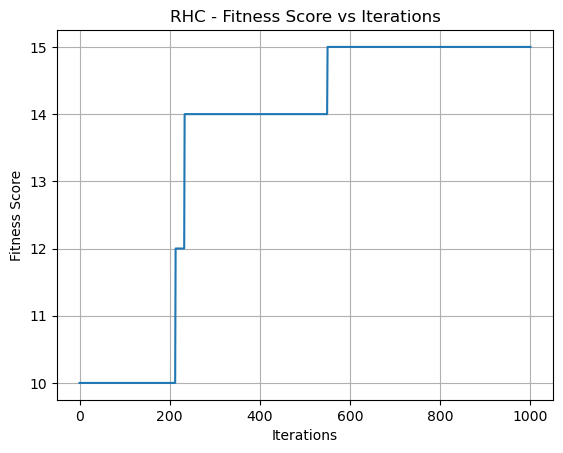

In [5]:
# Plot fitness score
plt.plot(rhc_run_curves["Fitness"].values)

plt.xlabel("Iterations")
plt.ylabel("Fitness Score")
plt.title("RHC - Fitness Score vs Iterations")
plt.grid()

## Simulated Annealing

In [6]:
# SARunner?

In [7]:
%%time
sa = SARunner(problem=problem,
              experiment_name='cp',
              output_directory="output",
              seed=1,
              iteration_list=[1000],
              temperature_list= [0.1]
              )

sa_run_stats, sa_run_curves = sa.run()

CPU times: total: 391 ms
Wall time: 391 ms


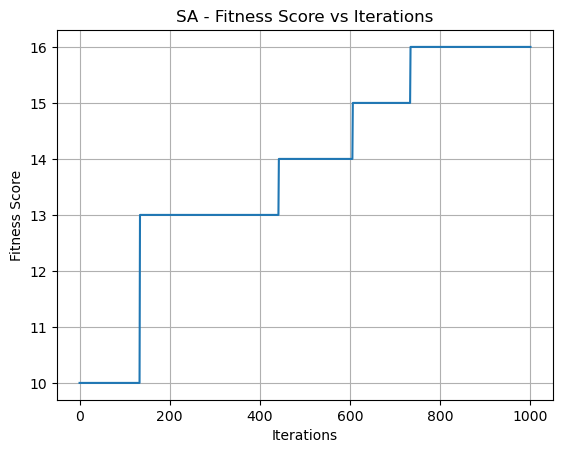

In [8]:
# Plot fitness score
plt.plot(sa_run_curves["Fitness"].values)

plt.xlabel("Iterations")
plt.ylabel("Fitness Score")
plt.title("SA - Fitness Score vs Iterations")
plt.grid()

## Genetic Algorithm

In [9]:
# GARunner?

In [10]:
%%time
ga = GARunner(problem=problem,
              experiment_name='cp',
              output_directory="output",
              seed=1,
              iteration_list=[1000],
              population_sizes=[25],
              mutation_rates=[.1]
              )

ga_run_stats, ga_run_curves = ga.run()

CPU times: total: 4.56 s
Wall time: 4.57 s


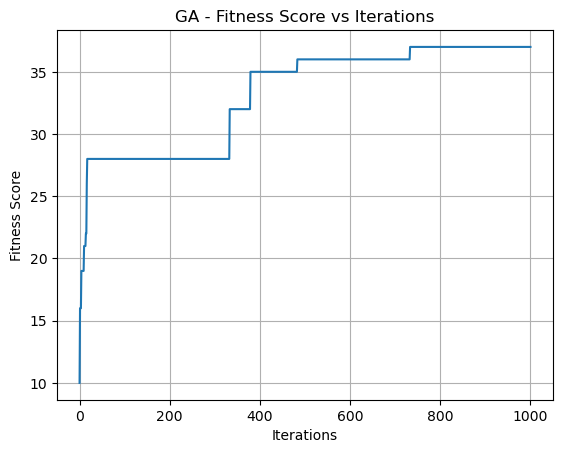

In [11]:
# Plot fitness score
plt.plot(ga_run_curves["Fitness"].values)

plt.xlabel("Iterations")
plt.ylabel("Fitness Score")
plt.title("GA - Fitness Score vs Iterations")
plt.grid()

## MIMIC

In [12]:
# MIMICRunner?

In [13]:
%%time
mimic = MIMICRunner(problem=problem,
              experiment_name='cp',
              output_directory="output",
              seed=1,
              iteration_list=[1000],
              population_sizes=[10],
              keep_percent_list=[0.2],
              use_fast_mimic=True
              )

mimic_run_stats, mimic_run_curves = mimic.run()

CPU times: total: 5min 5s
Wall time: 5min 6s


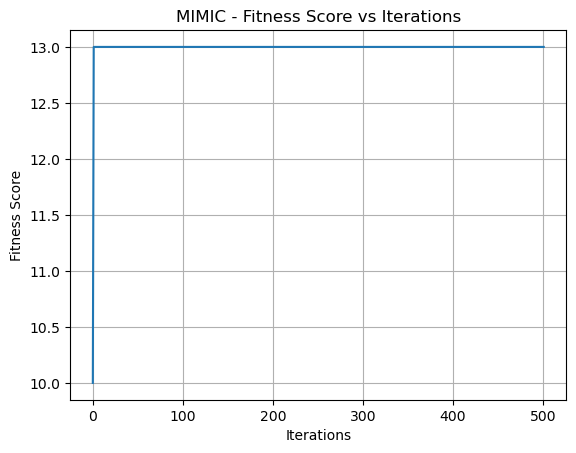

In [14]:
# Plot fitness score
plt.plot(mimic_run_curves["Fitness"].values)

plt.xlabel("Iterations")
plt.ylabel("Fitness Score")
plt.title("MIMIC - Fitness Score vs Iterations")
plt.grid()

## Comparing Algorithms

In [15]:
rhc_run_stats["algo"] = "rhc"
sa_run_stats["algo"] = "sa"
ga_run_stats["algo"] = "ga"
mimic_run_stats["algo"] = "mimic"

In [16]:
df = pd.concat([rhc_run_stats, sa_run_stats, ga_run_stats, mimic_run_stats]).dropna(axis=1)
df = df[df["Iteration"]!=0]
df

,Iteration,Fitness,FEvals,Time,State,max_iters,algo
1,1000,15.0,1003,0.235780,"[1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, ...",1000,rhc
1,1000,16.0,1985,0.367278,"[1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...",1000,sa
1,1000,37.0,26035,4.556093,"[1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, ...",1000,ga
1,1000,13.0,5522,305.951851,"[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...",1000,mimic


### Fitness Score vs Iterations

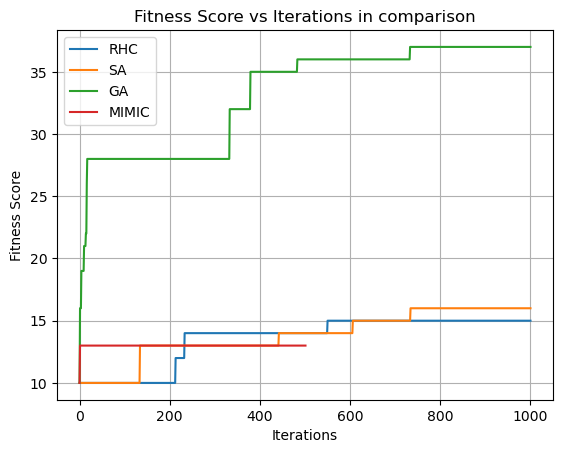

In [17]:
# Plot fitness score
plt.plot(rhc_run_curves["Fitness"].values, label='RHC')
plt.plot(sa_run_curves["Fitness"].values, label='SA')
plt.plot(ga_run_curves["Fitness"].values, label='GA')
plt.plot(mimic_run_curves["Fitness"].values, label='MIMIC')

plt.xlabel("Iterations")
plt.ylabel("Fitness Score")
plt.title("Fitness Score vs Iterations in comparison")
plt.legend()
plt.grid()
plt.savefig('image/cp_fitness.png')

### Iteration Time

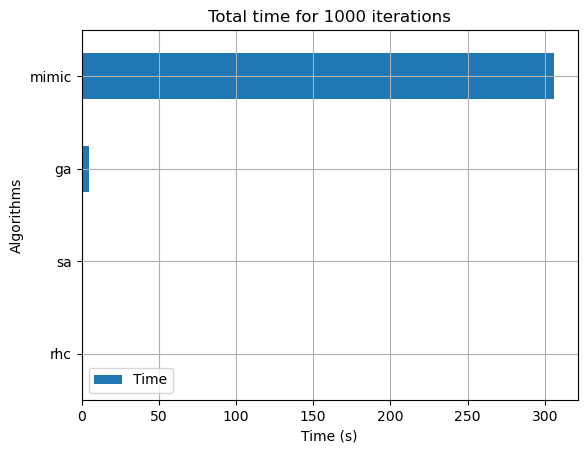

In [18]:
# Plot fitness score
df.plot.barh(x='algo', y='Time')

plt.xlabel("Time (s)")
plt.ylabel("Algorithms")
plt.title("Total time for 1000 iterations")
plt.grid()
plt.savefig('image/cp_time.png')